# Import libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import sweetviz as sv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, mean_squared_error, r2_score 
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
sns.set(style="ticks", font_scale=1.5)

# Import Train and Test data

In [3]:
data_path_train = "./model_2_crossterm_pr_pr_train.csv"
data_path_test = "./model_2_crossterm_pr_pr_test.csv"
data_train = pd.read_csv(data_path_train)
data_test = pd.read_csv(data_path_test)
data_train.drop(columns=['Train (1)/Test(2)'], inplace=True)
data_test.drop(columns=['Train (1)/Test(2)'], inplace=True)
data_train.head()

,pIC50,apol,ast_fraglike,ast_fraglike_ext,ast_violation,ast_violation_ext,a_acc,a_acid,a_aro,a_base,...,crossterm_pr_pr46,crossterm_pr_pr47,crossterm_pr_pr48,crossterm_pr_pr49,crossterm_pr_pr50,crossterm_pr_pr51,crossterm_pr_pr52,crossterm_pr_pr53,crossterm_pr_pr54,crossterm_pr_pr55
0,-0.221849,49.293861,0,0,2,4,5,0,6,0,...,818.72,254.56,452.36,500.52,704.48,1251.88,1385.16,389.24,430.68,765.33
1,2.681241,48.911480,0,0,1,2,3,0,6,0,...,818.72,254.56,452.36,500.52,704.48,1251.88,1385.16,389.24,430.68,765.33
2,1.176091,70.099411,0,0,4,6,4,0,16,0,...,818.72,254.56,452.36,500.52,704.48,1251.88,1385.16,389.24,430.68,765.33
3,2.642465,70.150238,0,0,3,4,3,0,22,0,...,818.72,254.56,452.36,500.52,704.48,1251.88,1385.16,389.24,430.68,765.33
4,2.924279,56.767067,0,0,3,5,6,0,16,0,...,818.72,254.56,452.36,500.52,704.48,1251.88,1385.16,389.24,430.68,765.33


# Train data infomation

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2984 entries, 0 to 2983
Columns: 273 entries, pIC50 to crossterm_pr_pr55
dtypes: float64(189), int64(84)
memory usage: 6.2 MB


In [5]:
print("Train Data Shape: ", data_train.shape)
print("Test Data Shape: ", data_test.shape)

Train Data Shape:  (2984, 273)
Test Data Shape:  (1279, 273)


# One distinct value columns

In [6]:
one_distinct_value = list(data_train.nunique(axis = 0)[data_train.nunique(axis = 0) < 2].index)
one_distinct_value

['a_acid',
 'a_nB',
 'a_nP',
 'mutagenic',
 'nmol',
 'PC+',
 'PC-',
 'Q_PC+',
 'Q_PC-',
 'Q_RPC+',
 'Q_RPC-',
 'Q_VSA_FHYD',
 'Q_VSA_FNEG',
 'Q_VSA_FPNEG',
 'Q_VSA_FPOL',
 'Q_VSA_FPOS',
 'Q_VSA_FPPOS',
 'Q_VSA_NEG',
 'Q_VSA_PNEG',
 'Q_VSA_POL',
 'Q_VSA_PPOS',
 'RPC+',
 'RPC-',
 'vsa_acid']

# Create EDA Report

In [7]:
# my_report = sv.analyze(data_train, target_feat='pIC50')
# my_report.show_html("Train_data_EDA_report.html")

In [8]:
# feature_config = sv.FeatureConfig(skip=one_distinct_value)

In [9]:
# compare_report = sv.compare([data_train, "Train"], [data_test, "Test"], "pIC50", feature_config)
# compare_report.show_html("Compare_EDA_report.html")

# Split Train and Test data

In [10]:
features = [col for col in data_train.columns if col not in ['pIC50'] + one_distinct_value]

In [11]:
print("Dataset size:")
print("Number of Columns:", data_train.shape[1])
print("Number of Trainning Features:", len(features))
print("Train samples:", data_train.shape[0])
print("Test samples:", data_test.shape[0])


Dataset size:
Number of Columns: 273
Number of Trainning Features: 248
Train samples: 2984
Test samples: 1279


In [12]:
X_train = data_train[features]
y_train = data_train.pIC50
X_test = data_test[features]
y_test = data_test.pIC50

In [13]:
print("Number of missing values:", sum(data_train.isnull().sum()) + sum(data_test.isnull().sum()))

Number of missing values: 0


In [14]:
vt = VarianceThreshold(0.05)
X_train_vt = vt.fit_transform(X_train)
X_test_vt = vt.transform(X_test)
print("After reduction low variance features:")
print("Training set shape:", X_train_vt.shape)
print("Testing set shape:", X_test_vt.shape)

After reduction low variance features:
Training set shape: (2984, 202)
Testing set shape: (1279, 202)


# Using XGBoost regressor model

In [19]:
reg = xgb.XGBRegressor()
reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [30]:
prediction = reg.predict(X_test)

def report(y_true, y_pred):
    return [('MSE', mean_squared_error(y_true, y_pred)),
            ('RMSE', np.sqrt(mean_squared_error(y_true, y_pred))),
            ('MAE', mean_absolute_error(y_true, y_pred)),
            ('R2', r2_score(y_true, y_pred)),
            ('EVS', explained_variance_score(y_true, y_pred))
            ]
print("Train dataset report:")
for name, value in report(y_train, reg.predict(X_train)):
    print("{}: \t{}".format(name, value))
print("Test dataset report:")
for name, value in report(y_test, prediction):
    print("{}: \t{}".format(name, value))

Train dataset report:
MSE: 	0.020906196766175524
RMSE: 	0.14458975332358626
MAE: 	0.10144559649431836
R2: 	0.9825187579845667
EVS: 	0.982518758244139
Test dataset report:
MSE: 	0.3411198191893437
RMSE: 	0.5840546371610653
MAE: 	0.4215063828769164
R2: 	0.7207198676541527
EVS: 	0.7213874004672054


In [21]:
from operator import itemgetter
arr = np.stack((np.array(y_test), prediction), axis=1)
arr = [list(a) for a in arr]
arr = np.array(sorted(list(arr), key=itemgetter(1)))
np.shape(arr)

(1279, 2)

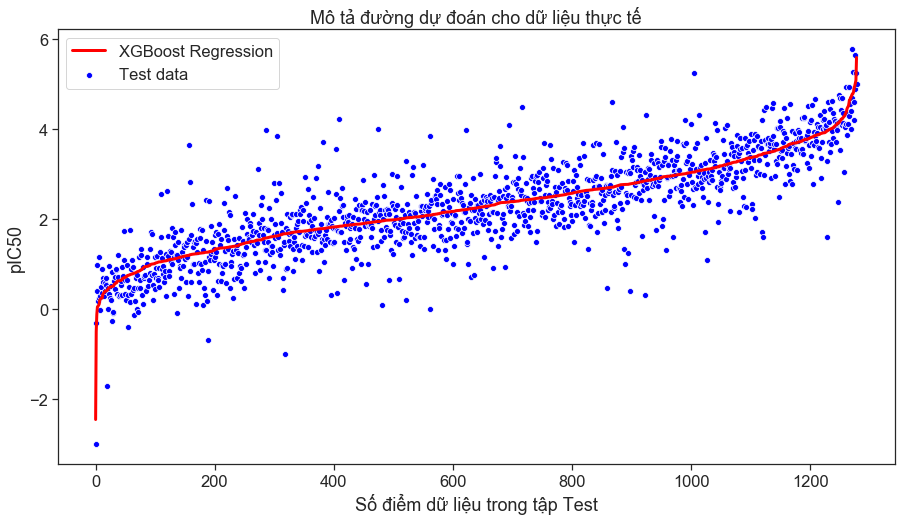

In [22]:
plt.figure(figsize=(15, 8))
sns.set(style="ticks", rc={"lines.linewidth": 3}, font_scale=1.5)
sns.scatterplot(x=np.arange(1279), y=arr[:, 0], color='blue', label='Test data')
sns.lineplot(x=np.arange(
    1279), y=arr[:, 1], color='red', label='XGBoost Regression')
plt.title('Mô tả đường dự đoán cho dữ liệu thực tế')
plt.xlabel("Số điểm dữ liệu trong tập Test")
plt.ylabel('pIC50')
plt.savefig('line.png')

# k-fold Cross Validation using XGBoost

In [112]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])
data_dmatrix = xgb.DMatrix(data=X, label=y)
params = {'max_depth': 5}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results.tail(5)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
45,0.353993,0.009815,0.644465,0.014668
46,0.350067,0.011449,0.643439,0.014284
47,0.345759,0.011146,0.641563,0.014673
48,0.342725,0.012124,0.641383,0.014077
49,0.339189,0.010406,0.640596,0.014472


In [113]:
print("Test RMSE CV Mean:", cv_results.iloc[-1]["test-rmse-mean"])

Test RMSE CV Mean: 0.6405963333333333


# Visualize Boosting Trees and Feature Importance

In [62]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

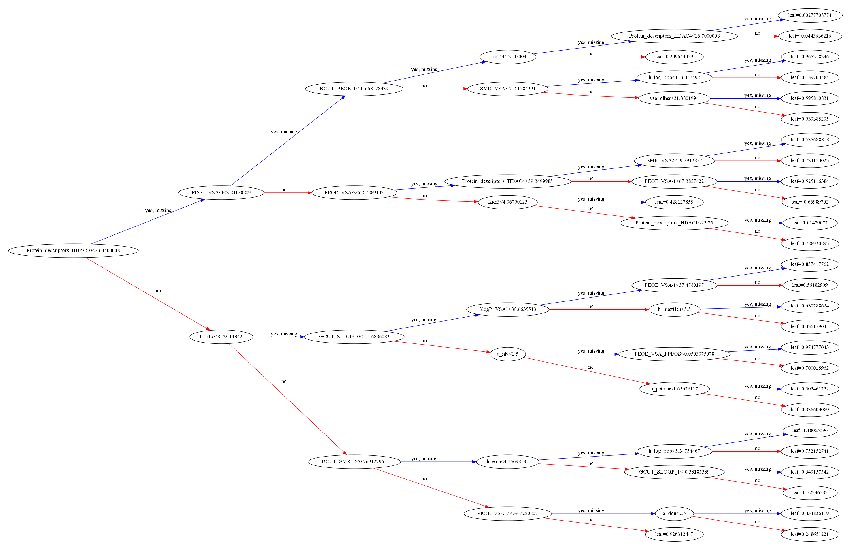

In [97]:
xgb.plot_tree(xg_reg, rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')

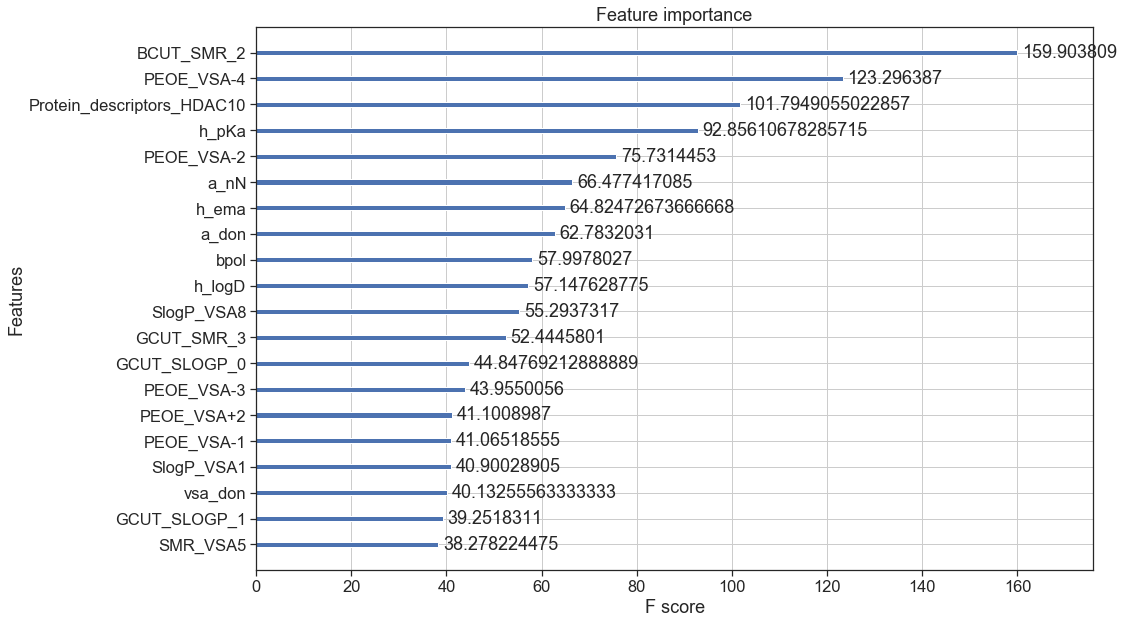

In [99]:
ax = xgb.plot_importance(xg_reg, importance_type='gain', max_num_features=20)
fig = plt.gcf()
fig.set_size_inches(15, 10)